In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

spring_SS = pd.read_csv('spring_turb_SS_data.csv', index_col=0, parse_dates=True)
summer_SS = pd.read_csv('summer_turb_SS_data.csv', index_col=0, parse_dates=True)
discharge = pd.read_csv('discharge_2023.csv', index_col=0, parse_dates=True)
shear_stress = pd.read_csv('mobile_shear_stress_2023.csv', index_col=0, parse_dates=True)


In [2]:
# resample the date frames so they have 1-min intervals instead of 15-min intervals
spring_SS = spring_SS.resample('1T').mean().interpolate()
summer_SS = summer_SS.resample('1T').mean().interpolate()
discharge = discharge.resample('1T').mean().interpolate()
shear_stress = shear_stress.resample('1T').mean().interpolate()

# merge the discharge and shear stresses as new columns by date
spring_SS = spring_SS.merge(discharge, on='Date_Time')
spring_SS = spring_SS.merge(shear_stress, on='Date_Time')
summer_SS = summer_SS.merge(discharge, on='Date_Time')
summer_SS = summer_SS.merge(shear_stress, on='Date_Time')

### Plotting Time Series

Spring 

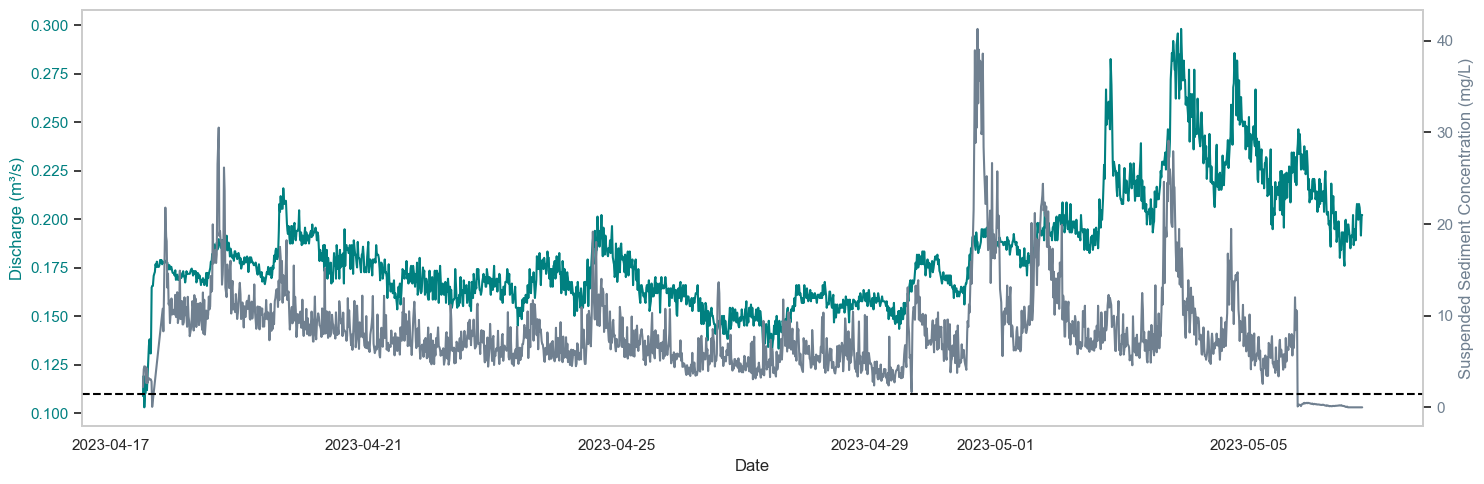

In [3]:
sns.set_theme(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(15, 5))

# discharge on the left y-axis
color = 'teal'
sns.lineplot(x=spring_SS.index, y=spring_SS['Q'], ax=ax1, color=color)
ax1.set_xlabel('Date')
ax1.set_ylabel('Discharge (m³/s)', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)

# twin axis for suspended sediment
ax2 = ax1.twinx()
color = 'slategray'
sns.lineplot(x=spring_SS.index, y=spring_SS['SSC (mg/L)'], ax=ax2, color=color)
ax2.set_ylabel('Suspended Sediment Concentration (mg/L)', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)

# add a dashed line for the threshold of suspended sediment 
ax2.axhline(y=1.5, color='black', linestyle='--')

fig.tight_layout()
plt.show()


#### Summer

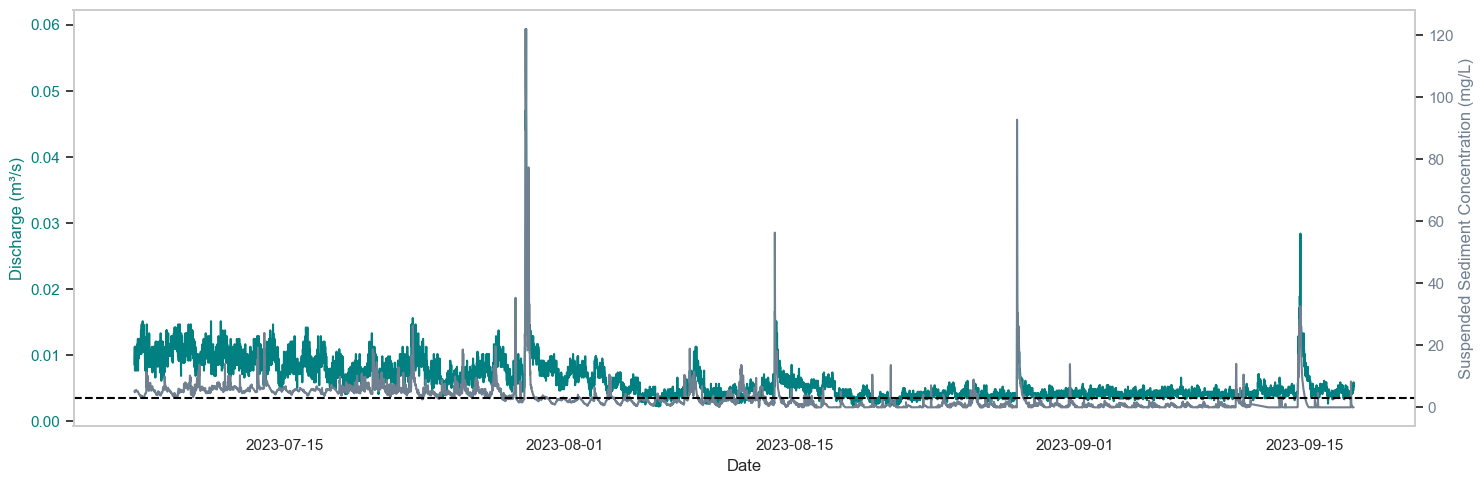

In [5]:
sns.set_theme(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(15, 5))

# discharge on the left y-axis
color = 'teal'
sns.lineplot(x=summer_SS.index, y=summer_SS['Q'], ax=ax1, color=color)
ax1.set_xlabel('Date')
ax1.set_ylabel('Discharge (m³/s)', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(False)

# twin axis for suspended sediment
ax2 = ax1.twinx()
color = 'slategray'
sns.lineplot(x=summer_SS.index, y=summer_SS['SSC (mg/L)'], ax=ax2, color=color)
ax2.set_ylabel('Suspended Sediment Concentration (mg/L)', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)

# add a dashed line for the threshold of suspended sediment 
ax2.axhline(y=3, color='black', linestyle='--')

fig.tight_layout()
plt.show()